In [1]:
with open ("infos.txt", 'r') as f:
    for line in f :
        print(line)

 module load ncbi-blast/2.2.26

 creer virtualenv sur arwen et installer numpy



 


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import json

In [13]:
d={"Number of helices":["3 -- 6","6"], "Number of proteins":[10,5]}
d

{'Number of helices': ['3 -- 6', '6'], 'Number of proteins': [10, 5]}

In [14]:
df = pd.DataFrame(d)
df

,Number of helices,Number of proteins
0,3 -- 6,10
1,6,5


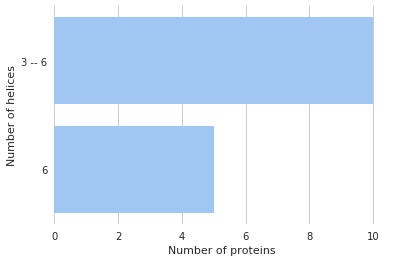

In [20]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Number of proteins", y="Number of helices", data=df,
            label="All", color="b")
sns.despine(left=True, bottom=True)

### lecture du fichier TMHMM JSON 

In [24]:
import json

with open('TMHMM_DataAll.txt') as f:
    TMHMM_data = json.load(f)

In [27]:
d={"Number of helices":["3 -- 7","7","6","5","4","3"], "Number of proteins":[0,0,0,0,0,0]}
goodProteinTMHMM = set([])
for keys in TMHMM_data : 
    nbH = TMHMM_data[keys]['nb_of_predicted_TMHs']
    try :  
        nbI = d["Number of helices"].index(nbH)
    except ValueError:
        print("found " + nbH)
        continue
    d["Number of proteins"][0] += 1
    d["Number of proteins"][nbI] += 1
    goodProteinTMHMM.add(keys)
d


found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2
found 2


{'Number of helices': ['3 -- 7', '7', '6', '5', '4', '3'],
 'Number of proteins': [12575, 2053, 5783, 2405, 1968, 366]}

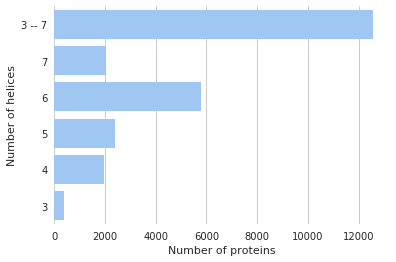

In [28]:
df = pd.DataFrame(d)
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Number of proteins", y="Number of helices", data=df,
            label="All", color="b")
sns.despine(left=True, bottom=True)

In [43]:
d1={"Name of Domains":["NAD","FAD","Ferric"], 
    "Number of proteins":[47958,13028,26254], 
    "Number of proteins where domains are superior than 1":[10279,1622,12319]
   }

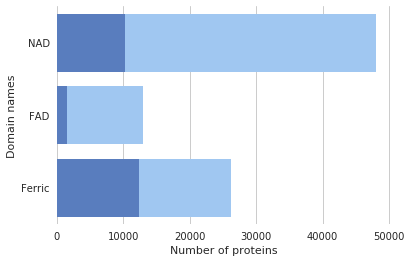

In [49]:
df = pd.DataFrame(d1)
f, ax = plt.subplots()
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Number of proteins", y="Name of Domains", data=df,
            label="All", color="b")
sns.despine(left=True, bottom=True)

sns.set_color_codes("muted")
ax=sns.barplot(x="Number of proteins where domains are superior than 1", y="Name of Domains", data=df,
            label="more than 1 domain", color="b")

ax.set_xlabel("Number of proteins")
ax.set_ylabel("Domain names")
#ax.legend(ncol=2, loc="lower right", frameon=True)
#ax.set(xlim=(0, 24), ylabel="",
#       xlabel="more than 1 domain")
sns.despine(left=True, bottom=True)

### diagramme de venn des HMM

In [79]:
a=set([2,4,6,8,9,11,24])
b=set([2,3,6,7,9,12,24])
c=set([1,6,7,9,12])

# Import the library
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
 
# Make the diagram
venn3(subsets = (len(a - b - c), len(b - a - c ), len(a&b), len(c - b - a),len(c & a), len(c & b), len(c&b&a)))
plt.show()

ImportError: No module named 'matplotlib_venn'

#### Read FAD positive trembl entries

In [52]:
import json

with open('HMM_DataFAD.txt') as f:
    FAD_data = json.load(f)
    FAD_set = set (FAD_data["data"])
    
    
with open('HMM_DataNAD.txt') as f:
    NAD_data = json.load(f)
    NAD_set = set (NAD_data["data"])
    
    
with open('HMM_DataFerric.txt') as f:
    Ferric_data = json.load(f)
    Ferric_set = set (Ferric_data["data"])

In [59]:
s_0 = FAD_set | NAD_set
s1 = FAD_set & NAD_set
s2 = FAD_set & Ferric_set
s3 = Ferric_set & NAD_set
s4 = s2 & s3
list(s2)

[]

In [69]:
for s in FAD_data["data"]:
    if s in NAD_data["data"]:
        print (s)

In [76]:
for x in Ferric_data["data"]:
    if x.startswith("tr|A0A0K9R"):
        print(x)

tr|A0A0K9TA84|A0A0K9TA84_ECOLX
tr|A0A0K9T5Q7|A0A0K9T5Q7_ECOLX
tr|A0A0K9XYN5|A0A0K9XYN5_9FLAO
tr|A0A0K9F5D1|A0A0K9F5D1_9BACI
tr|A0A0K9FB48|A0A0K9FB48_9BACI
tr|A0A0K9Z1J1|A0A0K9Z1J1_9BACL
tr|A0A0K9YWS8|A0A0K9YWS8_9BACL
tr|A0A0K9YMT4|A0A0K9YMT4_9BACL
tr|A0A0K9YLW7|A0A0K9YLW7_9BACL
tr|A0A0K9JRP6|A0A0K9JRP6_9BURK
tr|A0A0K9MJF5|A0A0K9MJF5_9BACI
tr|A0A0K9MFN1|A0A0K9MFN1_9BACI
tr|A0A0K9H8W5|A0A0K9H8W5_9BACI
tr|A0A0K9H5M1|A0A0K9H5M1_9BACI
tr|A0A0K9Y2D3|A0A0K9Y2D3_9FLAO
tr|A0A0K9LBG5|A0A0K9LBG5_HAEIF
tr|A0A0K9K007|A0A0K9K007_9BURK
tr|A0A0K9JZ57|A0A0K9JZ57_9BURK
tr|A0A0K9JW22|A0A0K9JW22_9BURK
tr|A0A0K9PBI9|A0A0K9PBI9_ZOSMR
tr|A0A0K9Q047|A0A0K9Q047_ZOSMR
tr|A0A0K9PM80|A0A0K9PM80_ZOSMR
tr|A0A0K9RL58|A0A0K9RL58_SPIOL
tr|A0A0K9S3Y6|A0A0K9S3Y6_SPIOL
tr|A0A0K9S2E8|A0A0K9S2E8_SPIOL
tr|A0A0K9P427|A0A0K9P427_ZOSMR


In [71]:
NAD_data["data"]

['tr|A0A0M1K318|A0A0M1K318_9XANT',
 'tr|A0A1G4W3L5|A0A1G4W3L5_9FLAO',
 'tr|T0HX42|T0HX42_9SPHN',
 'tr|A0A157UCY4|A0A157UCY4_ENTCL',
 'tr|I7B1A2|I7B1A2_PSEPT',
 'tr|X7ZPA6|X7ZPA6_MYCKA',
 'tr|A0A1X0WDP5|A0A1X0WDP5_9GAMM',
 'tr|A0A242VD94|A0A242VD94_9STAP',
 'tr|A0A2I8S5N1|A0A2I8S5N1_9ENTR',
 'tr|A0A1V4PKB0|A0A1V4PKB0_9ACTN',
 'tr|G0EL80|G0EL80_BRAIP',
 'tr|A3WI64|A3WI64_9SPHN',
 'tr|A0A1F0S2V3|A0A1F0S2V3_9CORY',
 'tr|W6QSU2|W6QSU2_PSEP5',
 'tr|J2B2B9|J2B2B9_9RHIZ',
 'tr|A0A1S9AHM2|A0A1S9AHM2_9BURK',
 'tr|A0A0U3AHE9|A0A0U3AHE9_9ALTE',
 'tr|A0A1W2GYZ0|A0A1W2GYZ0_9BACT',
 'tr|A0A155G4W1|A0A155G4W1_ENTCL',
 'tr|A0A1V4PPL9|A0A1V4PPL9_9ACTN',
 'tr|A0A222GA19|A0A222GA19_9GAMM',
 'tr|A0A0M2ZD63|A0A0M2ZD63_9MYCO',
 'tr|A0A2N4YBS0|A0A2N4YBS0_9RHOB',
 'tr|A0A1H4YM71|A0A1H4YM71_TSUTY',
 'tr|A0A1I0E9U6|A0A1I0E9U6_9BURK',
 'tr|A0A099TF46|A0A099TF46_9RHOB',
 'tr|A0A1V4Q1Y6|A0A1V4Q1Y6_9ACTN',
 'tr|A0A1M6HFD1|A0A1M6HFD1_9BACI',
 'tr|A0A292AEQ2|A0A292AEQ2_SERFO',
 'tr|A0A1D9GH50|A0A1D9GH50_9ALTE',
 'tr|J

In [3]:
with open('TMHMMDataAllJeudi.txt') as f :
    TMHMMdict = json.load(f)
    dictResult={}
    for ID in TMHMMdict :
        for segment in TMHMMdict[ID]["domain"] :
            if segment[0] == "TMhelix" and int(TMHMMdict[ID]["nb_of_predicted_TMHs"]) :
                dictResult[ID]={}
                dictResult[ID]["nbTMprot"] = TMHMMdict[ID]["nb_of_predicted_TMHs"]
                taille = int(segment[2])-int(segment[1])
                dictResult[ID]["taille"]=taille


In [4]:
dictTaille = {}
for ID in dictResult :
    if dictResult[ID]["taille"] > 1 :
        if dictResult[ID]["taille"] not in dictTaille :
            dictTaille[dictResult[ID]["taille"]] = 1
        else :
            dictTaille[dictResult[ID]["taille"]] += 1
print(dictTaille)

{32: 3, 33: 1, 34: 8, 14: 4, 15: 1, 17: 2005, 18: 145, 19: 2007, 20: 35, 21: 55, 22: 8543, 29: 3, 31: 5}
